In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [26]:
df = pd.read_csv("data/processed_data.csv")
print(df.shape)
df.sample(5)

(978, 18)


,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS
267,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0.018294
204,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,-0.255895
430,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0.017524
456,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0.204702
379,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.012859


In [27]:
nbrs = NearestNeighbors(n_neighbors=5).fit(df)

# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

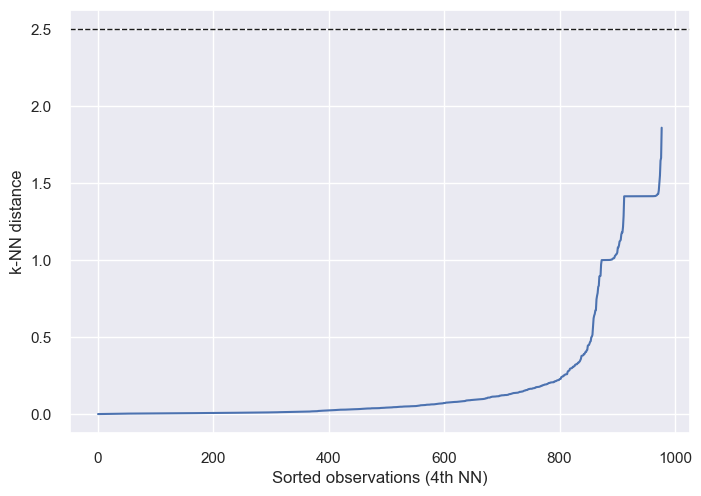

In [28]:
# Now, get the sorted kth column (distances with kth neighbors) and plot the kNN distance plot
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [29]:
clusters = DBSCAN(eps=0.4, min_samples=5).fit(df)

# check unique clusters (-1 is noise)
cluster_labels = set(clusters.labels_)
print(cluster_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, -1}


In [30]:
# Get clusters size 
from collections import Counter
cluster_sizes = Counter(clusters.labels_)
print(cluster_sizes)

Counter({2: 137, -1: 119, 0: 112, 8: 88, 5: 53, 13: 52, 10: 37, 7: 34, 15: 34, 4: 27, 19: 24, 20: 22, 18: 21, 3: 19, 1: 14, 14: 14, 6: 13, 26: 12, 29: 12, 16: 11, 25: 11, 17: 9, 32: 9, 12: 8, 22: 8, 30: 8, 9: 7, 11: 7, 28: 7, 36: 7, 27: 6, 31: 6, 21: 5, 23: 5, 24: 5, 33: 5, 34: 5, 35: 5})


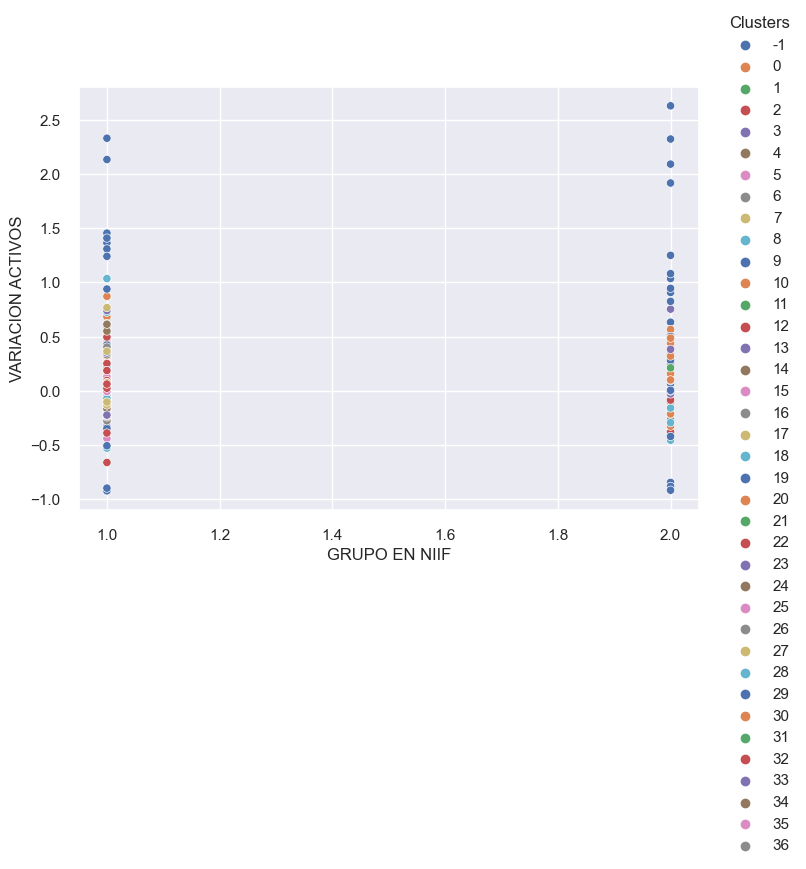

In [31]:
# Visualize clusters
p = sns.scatterplot(data=df, x="GRUPO EN NIIF", y="VARIACION ACTIVOS", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()